### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("Bicycle.csv")

In [3]:
df

,FiscalYear,CurrencyName,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,ResellerName,ProductLine,Color,ListPrice,EnglishProductName,SalesTotal
0,2006,Canadian Dollar,North America,Canada,Canada,Acceptable Sales & Service,R,Black,699.0982,"Road-650 Black, 52",419.4589
1,2006,Canadian Dollar,North America,Canada,Canada,Acceptable Sales & Service,R,Red,699.0982,"Road-650 Red, 44",419.4589
2,2006,Canadian Dollar,North America,Canada,Canada,Acceptable Sales & Service,R,Red,699.0982,"Road-650 Red, 62",419.4589
3,2006,Canadian Dollar,North America,Canada,Canada,Certified Sports Supply,M,Black,3374.9900,"Mountain-100 Black, 38",4049.9880
4,2006,Canadian Dollar,North America,Canada,Canada,Certified Sports Supply,M,Silver,3399.9900,"Mountain-100 Silver, 38",4079.9880
...,...,...,...,...,...,...,...,...,...,...,...
23755,2008,US Dollar,North America,United States,Southwest,Westside Plaza,T,Yellow,742.3500,"Touring-3000 Yellow, 62",10192.3912
23756,2008,US Dollar,North America,United States,Southwest,World Bike Discount Store,R,Silver/Black,62.0900,ML Road Pedal,74.5080
23757,2008,US Dollar,North America,United States,Southwest,World Bike Discount Store,R,Yellow,1120.4900,"Road-550-W Yellow, 38",672.2940
23758,2008,US Dollar,North America,United States,Southwest,World Bike Discount Store,R,Yellow,1120.4900,"Road-550-W Yellow, 48",2016.8820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23760 entries, 0 to 23759
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FiscalYear             23760 non-null  int64  
 1   CurrencyName           23760 non-null  object 
 2   SalesTerritoryGroup    23760 non-null  object 
 3   SalesTerritoryCountry  23760 non-null  object 
 4   SalesTerritoryRegion   23760 non-null  object 
 5   ResellerName           23760 non-null  object 
 6   ProductLine            22850 non-null  object 
 7   Color                  21455 non-null  object 
 8   ListPrice              23760 non-null  float64
 9   EnglishProductName     23760 non-null  object 
 10  SalesTotal             23760 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.0+ MB


In [5]:
df.describe(include='all')

,FiscalYear,CurrencyName,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,ResellerName,ProductLine,Color,ListPrice,EnglishProductName,SalesTotal
count,23760.000000,23760,23760,23760,23760,23760,22850,21455,23760.000000,23760,23760.000000
unique,NaN,5,3,6,10,633,4,8,NaN,250,NaN
top,NaN,US Dollar,North America,United States,Southwest,Vigorous Exercise Company,R,Black,NaN,AWC Logo Cap,NaN
freq,NaN,16327,19576,15155,5063,154,8019,7769,NaN,406,NaN
mean,2007.372054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715.069183,NaN,3385.967886
std,0.716084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,860.631462,NaN,5987.657854
min,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.290000,NaN,1.374000
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.290900,NaN,224.970000
50%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337.220000,NaN,919.691000
75%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.990000,NaN,3672.417200


In [6]:
df.shape

(23760, 11)

In [7]:
df.columns

Index(['FiscalYear', 'CurrencyName', 'SalesTerritoryGroup',
       'SalesTerritoryCountry', 'SalesTerritoryRegion', 'ResellerName',
       'ProductLine', 'Color', 'ListPrice', 'EnglishProductName',
       'SalesTotal'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

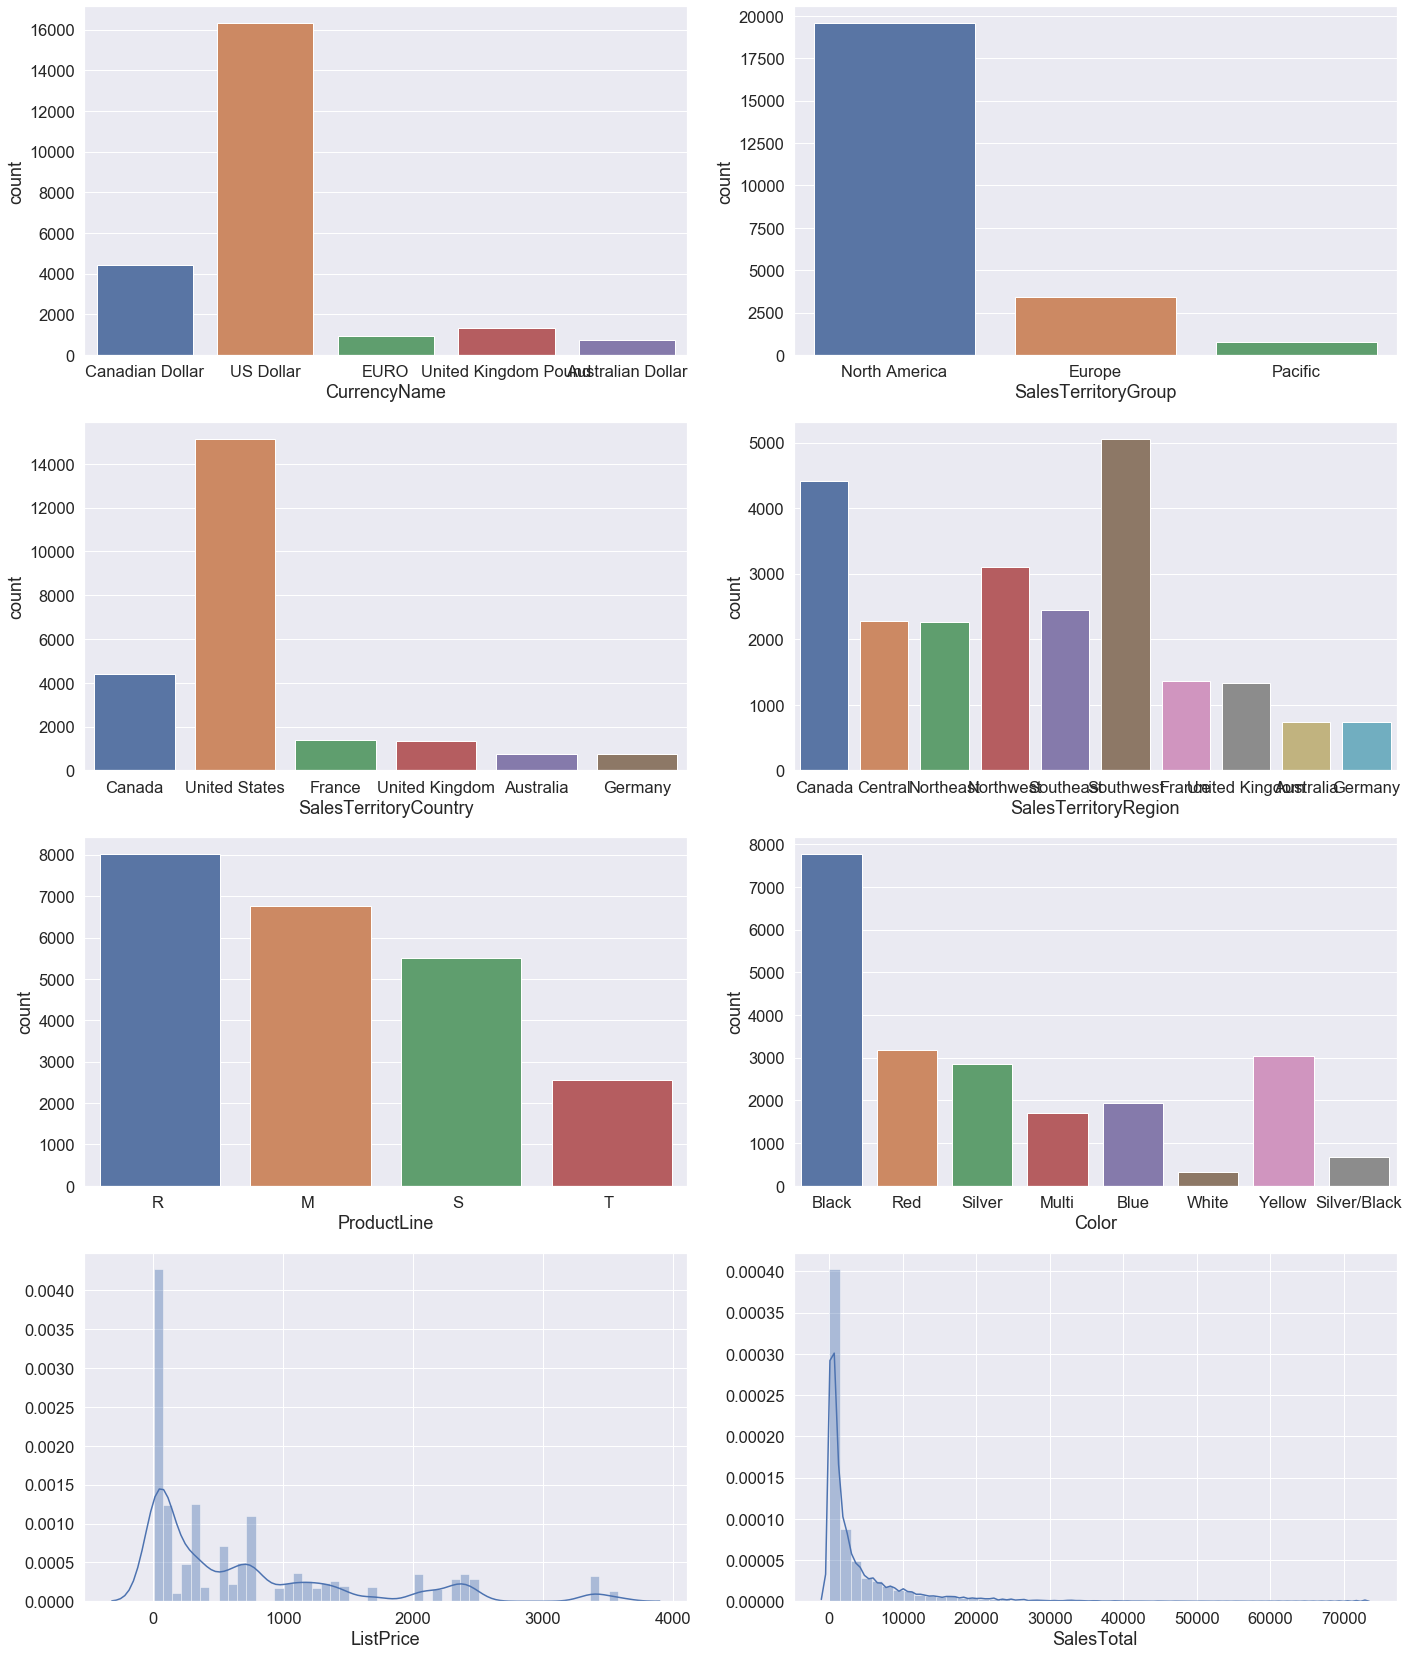

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.CurrencyName)
plt.subplot(7,2,2)
sns.countplot(df.SalesTerritoryGroup)
plt.subplot(7,2,3)
sns.countplot(df.SalesTerritoryCountry)
plt.subplot(7,2,4)
sns.countplot(df.SalesTerritoryRegion)
plt.subplot(7,2,5)
sns.countplot(df.ProductLine)
plt.subplot(7,2,6)
sns.countplot(df.Color)
plt.subplot(7,2,7)
sns.distplot(df.ListPrice)
plt.subplot(7,2,8)
sns.distplot(df.SalesTotal)
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

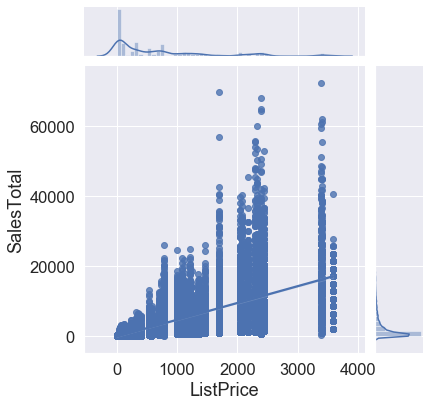

In [9]:
sns.jointplot(x='ListPrice', y='SalesTotal',data=df, kind='reg')

plt.show()

In [10]:
df.corr()

,FiscalYear,ListPrice,SalesTotal
FiscalYear,1.000000,-0.201065,-0.097967
ListPrice,-0.201065,1.000000,0.691398
SalesTotal,-0.097967,0.691398,1.000000


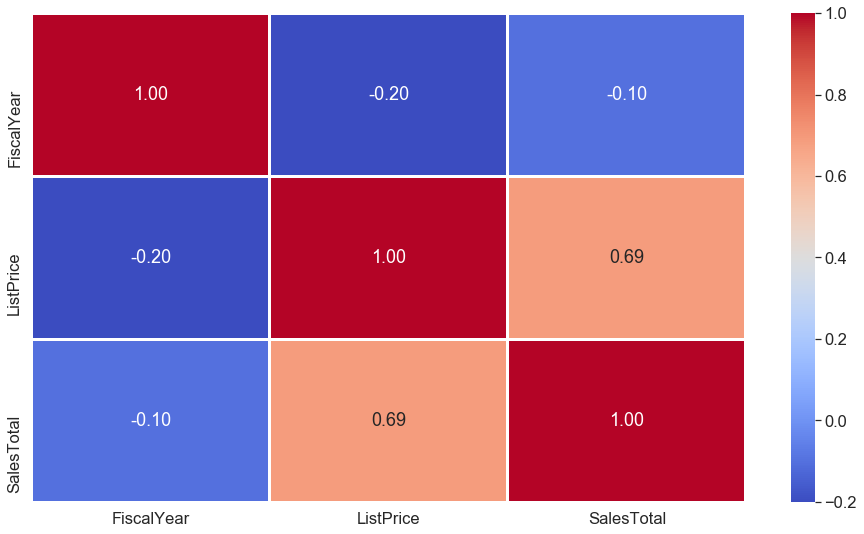

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

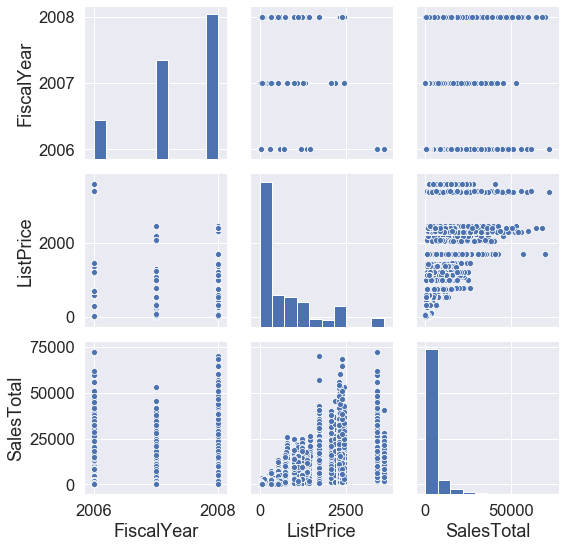

In [12]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

FiscalYear                  0
CurrencyName                0
SalesTerritoryGroup         0
SalesTerritoryCountry       0
SalesTerritoryRegion        0
ResellerName                0
ProductLine               910
Color                    2305
ListPrice                   0
EnglishProductName          0
SalesTotal                  0
dtype: int64

In [14]:
imputer = mdi.FrequentCategoryImputer(variables=['ProductLine','Color'])

In [15]:
imputer.fit(df)

FrequentCategoryImputer(variables=['ProductLine', 'Color'])

In [16]:
df = imputer.transform(df)

In [17]:
df.isnull().sum()

FiscalYear               0
CurrencyName             0
SalesTerritoryGroup      0
SalesTerritoryCountry    0
SalesTerritoryRegion     0
ResellerName             0
ProductLine              0
Color                    0
ListPrice                0
EnglishProductName       0
SalesTotal               0
dtype: int64

In [18]:
df['ProductLine'].value_counts()

R     8929
M     6752
S     5511
T     2568
Name: ProductLine, dtype: int64

In [19]:
df['Color'].value_counts()

Black           10074
Red              3186
Yellow           3029
Silver           2841
Blue             1932
Multi            1709
Silver/Black      676
White             313
Name: Color, dtype: int64

### Treat Duplicate Values

In [20]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [21]:
df.describe()

,FiscalYear,ListPrice,SalesTotal
count,23760.000000,23760.000000,23760.000000
mean,2007.372054,715.069183,3385.967886
std,0.716084,860.631462,5987.657854
min,2006.000000,2.290000,1.374000
25%,2007.000000,56.290900,224.970000
50%,2008.000000,337.220000,919.691000
75%,2008.000000,1079.990000,3672.417200
max,2008.000000,3578.270000,72365.185600


In [22]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=3,
                         variables=['ListPrice','SalesTotal'])

In [23]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=3, tail='both',
           variables=['ListPrice', 'SalesTotal'])

In [24]:
df2 = windsorizer.transform(df)

In [25]:
df2

,FiscalYear,CurrencyName,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,ResellerName,ProductLine,Color,ListPrice,EnglishProductName,SalesTotal
0,2006,Canadian Dollar,North America,Canada,Canada,Acceptable Sales & Service,R,Black,699.0982,"Road-650 Black, 52",419.4589
1,2006,Canadian Dollar,North America,Canada,Canada,Acceptable Sales & Service,R,Red,699.0982,"Road-650 Red, 44",419.4589
2,2006,Canadian Dollar,North America,Canada,Canada,Acceptable Sales & Service,R,Red,699.0982,"Road-650 Red, 62",419.4589
3,2006,Canadian Dollar,North America,Canada,Canada,Certified Sports Supply,M,Black,3374.9900,"Mountain-100 Black, 38",4049.9880
4,2006,Canadian Dollar,North America,Canada,Canada,Certified Sports Supply,M,Silver,3399.9900,"Mountain-100 Silver, 38",4079.9880
...,...,...,...,...,...,...,...,...,...,...,...
23755,2008,US Dollar,North America,United States,Southwest,Westside Plaza,T,Yellow,742.3500,"Touring-3000 Yellow, 62",10192.3912
23756,2008,US Dollar,North America,United States,Southwest,World Bike Discount Store,R,Silver/Black,62.0900,ML Road Pedal,74.5080
23757,2008,US Dollar,North America,United States,Southwest,World Bike Discount Store,R,Yellow,1120.4900,"Road-550-W Yellow, 38",672.2940
23758,2008,US Dollar,North America,United States,Southwest,World Bike Discount Store,R,Yellow,1120.4900,"Road-550-W Yellow, 48",2016.8820


In [26]:
df2.describe()

,FiscalYear,ListPrice,SalesTotal
count,23760.000000,23760.000000,23760.000000
mean,2007.372054,715.069183,2877.120154
std,0.716084,860.631462,4032.492375
min,2006.000000,2.290000,1.374000
25%,2007.000000,56.290900,224.970000
50%,2008.000000,337.220000,919.691000
75%,2008.000000,1079.990000,3672.417200
max,2008.000000,3578.270000,14014.758800


In [27]:
windsorizer.left_tail_caps_

{'ListPrice': -3014.8064000000004, 'SalesTotal': -10117.3716}

In [28]:
windsorizer.right_tail_caps_

{'ListPrice': 4151.0873, 'SalesTotal': 14014.7588}

### Treat Data Types

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23760 entries, 0 to 23759
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FiscalYear             23760 non-null  int64  
 1   CurrencyName           23760 non-null  object 
 2   SalesTerritoryGroup    23760 non-null  object 
 3   SalesTerritoryCountry  23760 non-null  object 
 4   SalesTerritoryRegion   23760 non-null  object 
 5   ResellerName           23760 non-null  object 
 6   ProductLine            23760 non-null  object 
 7   Color                  23760 non-null  object 
 8   ListPrice              23760 non-null  float64
 9   EnglishProductName     23760 non-null  object 
 10  SalesTotal             23760 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.0+ MB


### Drop unwanted features

In [30]:
df2.columns

Index(['FiscalYear', 'CurrencyName', 'SalesTerritoryGroup',
       'SalesTerritoryCountry', 'SalesTerritoryRegion', 'ResellerName',
       'ProductLine', 'Color', 'ListPrice', 'EnglishProductName',
       'SalesTotal'],
      dtype='object')

In [31]:
df2.drop(['FiscalYear', 'CurrencyName','ResellerName','EnglishProductName'],axis=1,inplace=True)

In [32]:
df2

,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,ProductLine,Color,ListPrice,SalesTotal
0,North America,Canada,Canada,R,Black,699.0982,419.4589
1,North America,Canada,Canada,R,Red,699.0982,419.4589
2,North America,Canada,Canada,R,Red,699.0982,419.4589
3,North America,Canada,Canada,M,Black,3374.9900,4049.9880
4,North America,Canada,Canada,M,Silver,3399.9900,4079.9880
...,...,...,...,...,...,...,...
23755,North America,United States,Southwest,T,Yellow,742.3500,10192.3912
23756,North America,United States,Southwest,R,Silver/Black,62.0900,74.5080
23757,North America,United States,Southwest,R,Yellow,1120.4900,672.2940
23758,North America,United States,Southwest,R,Yellow,1120.4900,2016.8820


In [33]:
df2.duplicated(keep='first').sum()

11838

In [34]:
df2[df2.duplicated(keep=False)]

,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,ProductLine,Color,ListPrice,SalesTotal
0,North America,Canada,Canada,R,Black,699.0982,419.4589
1,North America,Canada,Canada,R,Red,699.0982,419.4589
2,North America,Canada,Canada,R,Red,699.0982,419.4589
3,North America,Canada,Canada,M,Black,3374.9900,4049.9880
4,North America,Canada,Canada,M,Silver,3399.9900,4079.9880
...,...,...,...,...,...,...,...
23746,North America,United States,Southwest,T,Blue,1214.8500,14014.7588
23756,North America,United States,Southwest,R,Silver/Black,62.0900,74.5080
23757,North America,United States,Southwest,R,Yellow,1120.4900,672.2940
23758,North America,United States,Southwest,R,Yellow,1120.4900,2016.8820


In [35]:
df2.drop_duplicates(inplace=True)

In [36]:
df3 = pd.get_dummies(df2,drop_first=True)

In [37]:
df3

,ListPrice,SalesTotal,SalesTerritoryGroup_North America,SalesTerritoryGroup_Pacific,SalesTerritoryCountry_Canada,SalesTerritoryCountry_France,SalesTerritoryCountry_Germany,SalesTerritoryCountry_United Kingdom,SalesTerritoryCountry_United States,SalesTerritoryRegion_Canada,SalesTerritoryRegion_Central,SalesTerritoryRegion_France,SalesTerritoryRegion_Germany,SalesTerritoryRegion_Northeast,SalesTerritoryRegion_Northwest,SalesTerritoryRegion_Southeast,SalesTerritoryRegion_Southwest,SalesTerritoryRegion_United Kingdom,ProductLine_R,ProductLine_S,ProductLine_T,Color_Blue,Color_Multi,Color_Red,Color_Silver,Color_Silver/Black,Color_White,Color_Yellow
0,699.0982,419.4589,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,699.0982,419.4589,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,3374.9900,4049.9880,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3399.9900,4079.9880,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,297.6346,1071.4848,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23751,742.3500,14014.7588,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
23752,742.3500,11424.7665,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
23753,742.3500,5021.9978,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
23754,742.3500,1135.7955,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [38]:
df3.columns

Index(['ListPrice', 'SalesTotal', 'SalesTerritoryGroup_North America',
       'SalesTerritoryGroup_Pacific', 'SalesTerritoryCountry_Canada',
       'SalesTerritoryCountry_France', 'SalesTerritoryCountry_Germany',
       'SalesTerritoryCountry_United Kingdom',
       'SalesTerritoryCountry_United States', 'SalesTerritoryRegion_Canada',
       'SalesTerritoryRegion_Central', 'SalesTerritoryRegion_France',
       'SalesTerritoryRegion_Germany', 'SalesTerritoryRegion_Northeast',
       'SalesTerritoryRegion_Northwest', 'SalesTerritoryRegion_Southeast',
       'SalesTerritoryRegion_Southwest', 'SalesTerritoryRegion_United Kingdom',
       'ProductLine_R ', 'ProductLine_S ', 'ProductLine_T ', 'Color_Blue',
       'Color_Multi', 'Color_Red', 'Color_Silver', 'Color_Silver/Black',
       'Color_White', 'Color_Yellow'],
      dtype='object')

In [39]:
df3 = df3[['SalesTerritoryGroup_North America',
       'SalesTerritoryGroup_Pacific', 'SalesTerritoryCountry_Canada',
       'SalesTerritoryCountry_France', 'SalesTerritoryCountry_Germany',
       'SalesTerritoryCountry_United Kingdom',
       'SalesTerritoryCountry_United States', 'SalesTerritoryRegion_Canada',
       'SalesTerritoryRegion_Central', 'SalesTerritoryRegion_France',
       'SalesTerritoryRegion_Germany', 'SalesTerritoryRegion_Northeast',
       'SalesTerritoryRegion_Northwest', 'SalesTerritoryRegion_Southeast',
       'SalesTerritoryRegion_Southwest', 'SalesTerritoryRegion_United Kingdom',
       'ProductLine_R ', 'ProductLine_S ', 'ProductLine_T ', 'Color_Blue',
       'Color_Multi', 'Color_Red', 'Color_Silver', 'Color_Silver/Black',
       'Color_White', 'Color_Yellow','ListPrice', 'SalesTotal']]

In [40]:
df3.reset_index(drop=True,inplace=True)

In [41]:
df3

,SalesTerritoryGroup_North America,SalesTerritoryGroup_Pacific,SalesTerritoryCountry_Canada,SalesTerritoryCountry_France,SalesTerritoryCountry_Germany,SalesTerritoryCountry_United Kingdom,SalesTerritoryCountry_United States,SalesTerritoryRegion_Canada,SalesTerritoryRegion_Central,SalesTerritoryRegion_France,SalesTerritoryRegion_Germany,SalesTerritoryRegion_Northeast,SalesTerritoryRegion_Northwest,SalesTerritoryRegion_Southeast,SalesTerritoryRegion_Southwest,SalesTerritoryRegion_United Kingdom,ProductLine_R,ProductLine_S,ProductLine_T,Color_Blue,Color_Multi,Color_Red,Color_Silver,Color_Silver/Black,Color_White,Color_Yellow,ListPrice,SalesTotal
0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,699.0982,419.4589
1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,699.0982,419.4589
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3374.9900,4049.9880
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3399.9900,4079.9880
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,297.6346,1071.4848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11917,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500,14014.7588
11918,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500,11424.7665
11919,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500,5021.9978
11920,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500,1135.7955


### Create and save processed dataset

In [42]:
#df3.to_csv("bicycletrain.csv",index=False)

### Train Test Split

In [43]:
X = df3.iloc[:,0:27]
y = df3.iloc[:,27]

In [44]:
X

,SalesTerritoryGroup_North America,SalesTerritoryGroup_Pacific,SalesTerritoryCountry_Canada,SalesTerritoryCountry_France,SalesTerritoryCountry_Germany,SalesTerritoryCountry_United Kingdom,SalesTerritoryCountry_United States,SalesTerritoryRegion_Canada,SalesTerritoryRegion_Central,SalesTerritoryRegion_France,SalesTerritoryRegion_Germany,SalesTerritoryRegion_Northeast,SalesTerritoryRegion_Northwest,SalesTerritoryRegion_Southeast,SalesTerritoryRegion_Southwest,SalesTerritoryRegion_United Kingdom,ProductLine_R,ProductLine_S,ProductLine_T,Color_Blue,Color_Multi,Color_Red,Color_Silver,Color_Silver/Black,Color_White,Color_Yellow,ListPrice
0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,699.0982
1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,699.0982
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3374.9900
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3399.9900
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,297.6346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11917,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500
11918,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500
11919,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500
11920,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,742.3500


In [45]:
y

0          419.4589
1          419.4589
2         4049.9880
3         4079.9880
4         1071.4848
            ...    
11917    14014.7588
11918    11424.7665
11919     5021.9978
11920     1135.7955
11921    10192.3912
Name: SalesTotal, Length: 11922, dtype: float64

In [46]:
X.values, y.values

(array([[1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 6.990982e+02],
        [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 6.990982e+02],
        [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 3.374990e+03],
        ...,
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         1.000000e+00, 7.423500e+02],
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         1.000000e+00, 7.423500e+02],
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         1.000000e+00, 7.423500e+02]]),
 array([  419.4589,   419.4589,  4049.988 , ...,  5021.9978,  1135.7955,
        10192.3912]))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9537, 27), (2385, 27), (9537,), (2385,))

### Feature Scaling

In [49]:
X_train

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.0021500e+02],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.3548100e+01],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.4990000e+01],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 2.3840700e+03],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.0990000e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.3013636e+03]])

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train)

In [52]:
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train_scaled

array([[ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
        -0.36551711, -0.31029852],
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
        -0.36551711, -0.69235601],
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
        -0.36551711, -0.64893696],
       ...,
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
         2.73585004,  2.56735834],
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
        -0.36551711, -0.6130328 ],
       [-1.78818993, -0.1884274 , -0.44120705, ..., -0.14180657,
        -0.36551711,  1.07221712]])

In [54]:
X_test_scaled

array([[ 0.55922471, -0.1884274 ,  2.26650957, ..., -0.14180657,
         2.73585004,  1.62407301],
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
        -0.36551711, -0.63718525],
       [ 0.55922471, -0.1884274 ,  2.26650957, ..., -0.14180657,
        -0.36551711, -0.62131837],
       ...,
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
         2.73585004,  0.82244343],
       [ 0.55922471, -0.1884274 , -0.44120705, ..., -0.14180657,
         2.73585004, -0.65031789],
       [-1.78818993, -0.1884274 , -0.44120705, ..., -0.14180657,
         2.73585004,  0.65665939]])

### Model Training

### Using XGBoost (Scikit-Learn)

In [55]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [56]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:3792.99
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:3539.19
[2]	validation_0-rmse:3318.52
[3]	validation_0-rmse:3128.74
[4]	validation_0-rmse:2967.37
[5]	validation_0-rmse:2829
[6]	validation_0-rmse:2713.61
[7]	validation_0-rmse:2614.99
[8]	validation_0-rmse:2533.83
[9]	validation_0-rmse:2465.59
[10]	validation_0-rmse:2407.01
[11]	validation_0-rmse:2360.38
[12]	validation_0-rmse:2320.64
[13]	validation_0-rmse:2287.45
[14]	validation_0-rmse:2259.32
[15]	validation_0-rmse:2238.03
[16]	validation_0-rmse:2221.22
[17]	validation_0-rmse:2205.35
[18]	validation_0-rmse:2193.93
[19]	validation_0-rmse:2184.8
[20]	validation_0-rmse:2177.65
[21]	validation_0-rmse:2170.53
[22]	validation_0-rmse:2164.84
[23]	validation_0-rmse:2160.69
[24]	validation_0-rmse:2156.63
[25]	validation_0-rmse:2154.46
[26]	validation_0-rmse:2151.67
[27]	validation_0-rmse:2149.76
[28]	validation_0-rmse:2149.32
[29]	validation_0-rmse:2147.33
[30]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [57]:
y_pred = xgbmodel.predict(X_test_scaled)

In [58]:
y_pred

array([7730.5586 ,  715.49384,  805.45135, ..., 6745.744  ,  575.1581 ,
       5889.2407 ], dtype=float32)

### Model Evaluation

In [59]:
mse = mean_squared_error(y_test,y_pred)
mse

4551940.84964986

In [60]:
rmse = np.sqrt(mse)
rmse

2133.5277944404334

In [61]:
r2score = r2_score(y_test,y_pred)
r2score

0.5935367325059293

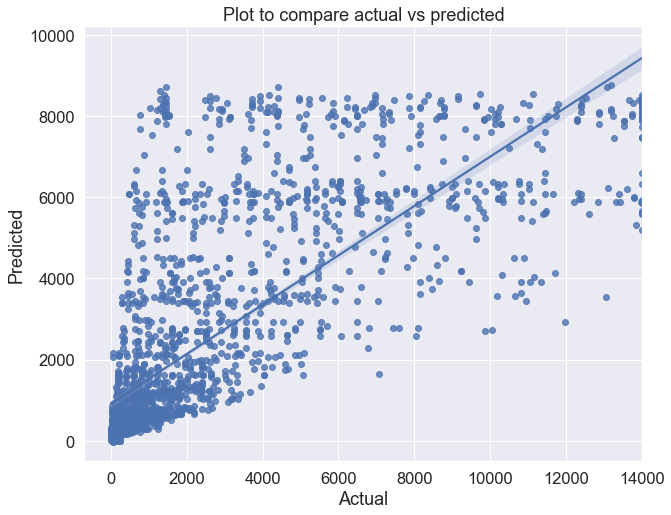

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [63]:
X.columns

Index(['SalesTerritoryGroup_North America', 'SalesTerritoryGroup_Pacific',
       'SalesTerritoryCountry_Canada', 'SalesTerritoryCountry_France',
       'SalesTerritoryCountry_Germany', 'SalesTerritoryCountry_United Kingdom',
       'SalesTerritoryCountry_United States', 'SalesTerritoryRegion_Canada',
       'SalesTerritoryRegion_Central', 'SalesTerritoryRegion_France',
       'SalesTerritoryRegion_Germany', 'SalesTerritoryRegion_Northeast',
       'SalesTerritoryRegion_Northwest', 'SalesTerritoryRegion_Southeast',
       'SalesTerritoryRegion_Southwest', 'SalesTerritoryRegion_United Kingdom',
       'ProductLine_R ', 'ProductLine_S ', 'ProductLine_T ', 'Color_Blue',
       'Color_Multi', 'Color_Red', 'Color_Silver', 'Color_Silver/Black',
       'Color_White', 'Color_Yellow', 'ListPrice'],
      dtype='object')

In [64]:
xgbmodel.get_booster().feature_names = ['SalesTerritoryGroup_North America', 'SalesTerritoryGroup_Pacific',
       'SalesTerritoryCountry_Canada', 'SalesTerritoryCountry_France',
       'SalesTerritoryCountry_Germany', 'SalesTerritoryCountry_United Kingdom',
       'SalesTerritoryCountry_United States', 'SalesTerritoryRegion_Canada',
       'SalesTerritoryRegion_Central', 'SalesTerritoryRegion_France',
       'SalesTerritoryRegion_Germany', 'SalesTerritoryRegion_Northeast',
       'SalesTerritoryRegion_Northwest', 'SalesTerritoryRegion_Southeast',
       'SalesTerritoryRegion_Southwest', 'SalesTerritoryRegion_United Kingdom',
       'ProductLine_R ', 'ProductLine_S ', 'ProductLine_T ', 'Color_Blue',
       'Color_Multi', 'Color_Red', 'Color_Silver', 'Color_Silver/Black',
       'Color_White', 'Color_Yellow', 'ListPrice']

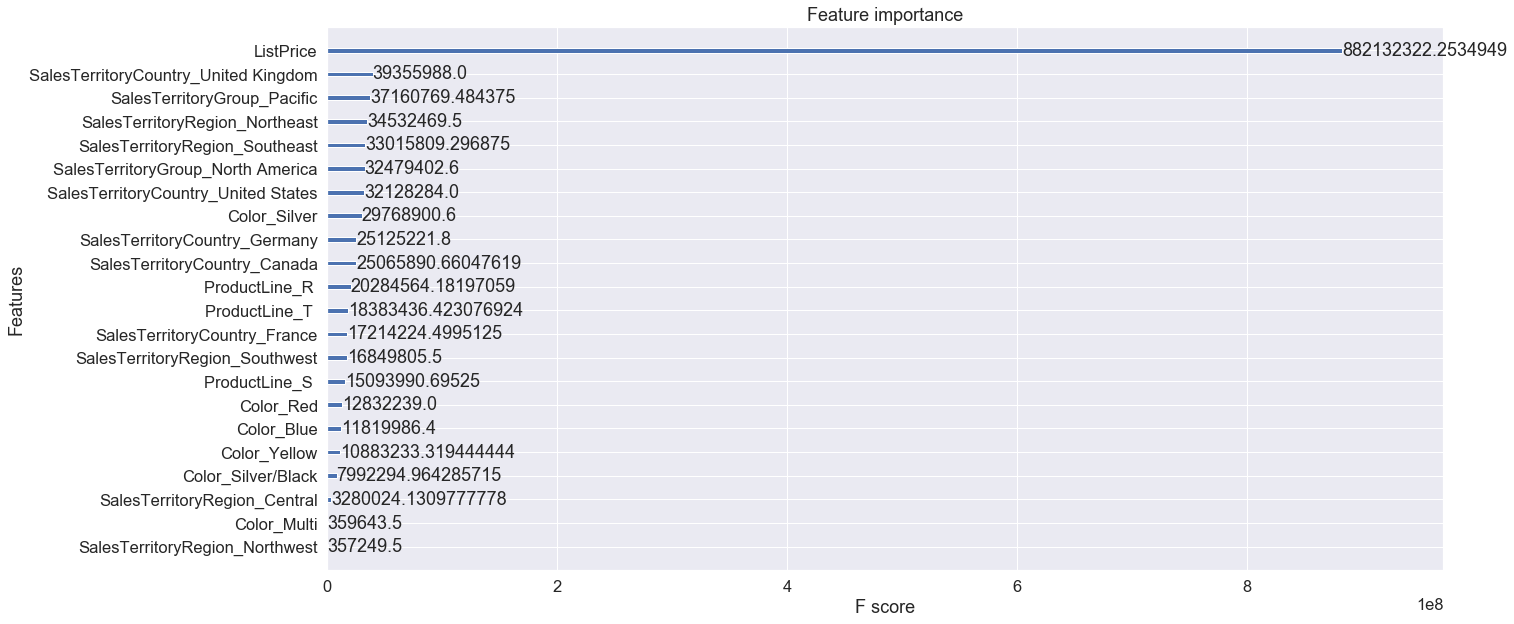

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax, importance_type='gain')
plt.show()

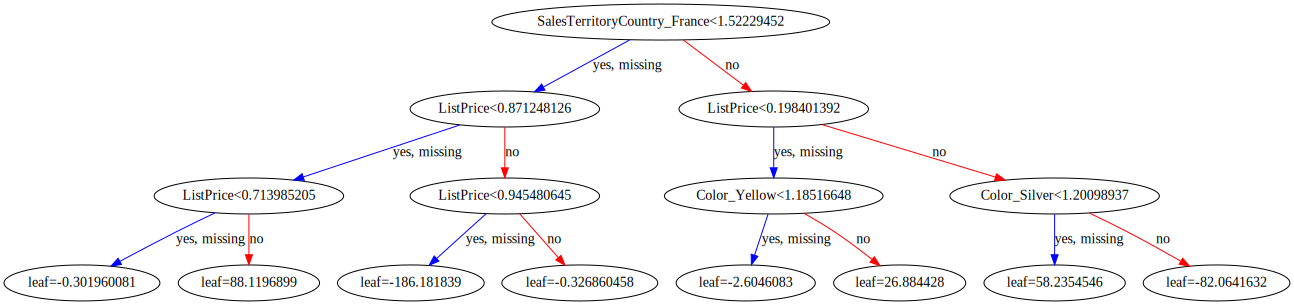

In [66]:
xgb.to_graphviz(xgbmodel,num_trees=50)

### Cross-Validation

In [67]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


In [68]:
cv.mean()

0.5811270939201265

### Save the Model

In [70]:
filename = 'modelbicycle.sav'
dump(xgbmodel,open(filename,'wb'))